In [1]:
#!pip3 install catboost

#!pip install lightgbm
#!conda install lightgbm
#conda install -c conda-forge lightgbm : konsoldan yuklenecek
#Kernel i restart yapmak gerek

#Use conda install in Anaconda Powershell Prompt then use pip install

#conda install -c conda-forge xgboost
!pip install xgboost

In [2]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

## Uyarilari Kaldirma
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None 


In [3]:
df_ = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv", delimiter = ';')
df = df_.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df["TotalCharges"].value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8   

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df['TotalCharges'].dtypes

dtype('float64')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df = df.drop(["customerID"], axis=1)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.shape

(7043, 20)

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [14]:
df["Churn_Cat"] = df["Churn"]

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,Yes


In [16]:
df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
30      0
31      0
32      0
33      0
34      0
35      0
36      1
37      0
38      1
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      0
50      0
51      1
52      0
53      1
54      0
55      1
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      1
81      0
82      1
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      1
96      0
97      1
98      0
99      1


In [17]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,Yes


In [19]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Cat            0
dtype: int64

In [20]:
df[df["TotalCharges"].isnull()].head(11)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Cat
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,0,No


In [21]:
#df["TotalCharges"] = df.apply(lambda row: row["MonthlyCharges"] if pd.isnull(row["TotalCharges"]) else row["TotalCharges"], axis=1)

In [22]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Cat            0
dtype: int64

In [23]:
len(df[df["TotalCharges"].isnull()])

11

In [24]:
for col in df.columns:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
Churn_Cat


In [25]:
df = df.drop(['Churn_Cat'],axis=1)

In [26]:
for col in df.columns:
    print(col)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [27]:
df["TotalCharges"].dtypes

dtype('float64')

In [28]:
df["gender"].dtypes

dtype('O')

In [29]:
[col for col in df.columns if df[col].dtypes == "O"]

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [30]:
cat_col = [col for col in df.columns if df[col].dtypes == "O"]

In [31]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
num_col = [col for col in df.columns if df[col].dtypes != "O" ]

In [33]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [34]:
for col_name in num_col:
    display(df.groupby(["Churn"]).agg({col_name:"mean"}))

,SeniorCitizen
Churn,
0,0.129
1,0.255


,tenure
Churn,
0,37.685
1,17.979


,MonthlyCharges
Churn,
0,61.265
1,74.441


,TotalCharges
Churn,
0,2555.344
1,1531.796


,Churn
Churn,
0,0.000
1,1.000


# DESCRIPTIVE STATISTICS : Categorical Variables


In [35]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [36]:
a = df["gender"].value_counts()

In [37]:
100 * df["gender"].value_counts() / len(df)

gender
Male     50.476
Female   49.524
Name: count, dtype: float64

In [38]:
b = 100 * df["gender"].value_counts() / len(df)

In [39]:
pd.DataFrame({
 "gender": b,
 "Ratio": a
})

,gender,Ratio
gender,,
Male,50.476,3555
Female,49.524,3488


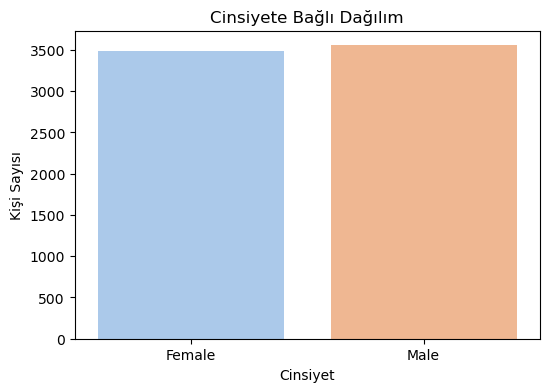

In [40]:
plt.figure(figsize=(6,4))

sns.countplot(x="gender",data=df, palette="pastel")

plt.title("Cinsiyete Bağlı Dağılım")

plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")

plt.show()

In [41]:
for col in cat_col:
    print(col)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


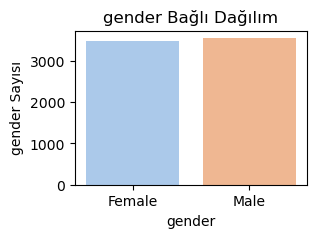

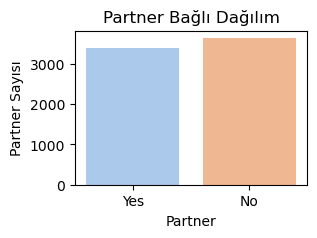

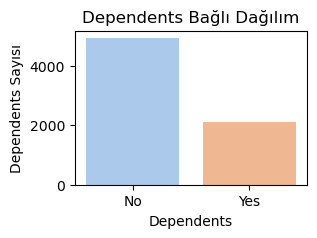

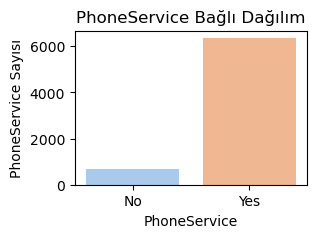

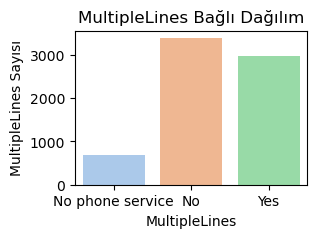

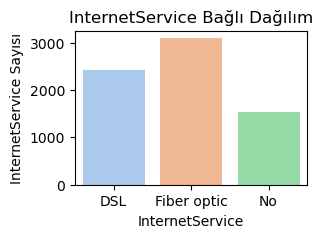

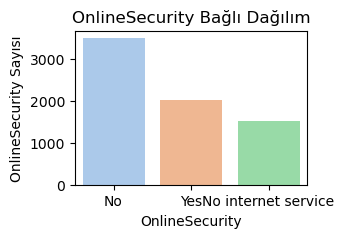

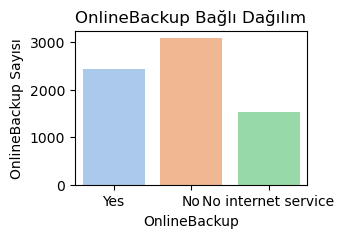

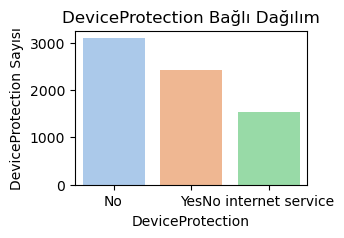

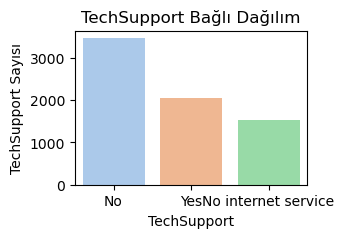

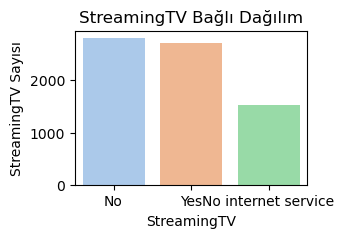

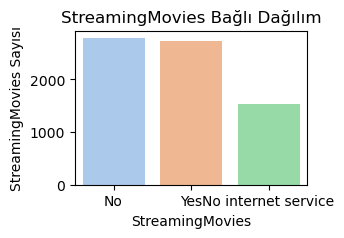

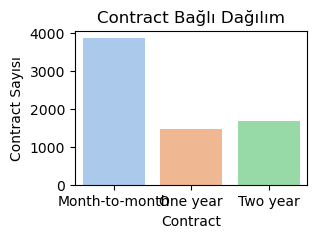

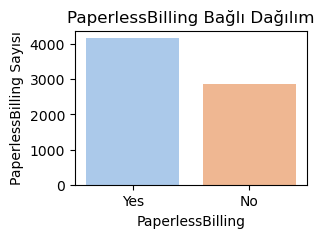

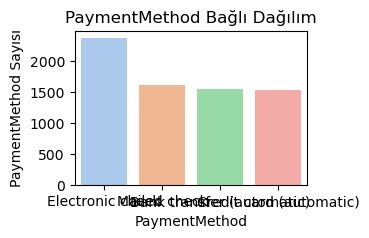

In [42]:
for col in cat_col:
    a = df[col].value_counts()
    b = 100 * df[col].value_counts() / len(df)
    
    plt.figure(figsize=(3,2))
    sns.countplot(x=col, data=df, palette="pastel")
    
    # Başlık ve etiketlerde f-string kullanarak değişkeni ekliyoruz
    plt.title(f"{col} Bağlı Dağılım")
    plt.xlabel(col)
    plt.ylabel(f"{col} Sayısı")
    
    plt.show()


# DESCRIPTIVE STATISTICS : Numerical Variables

In [43]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [44]:
df["TotalCharges"].describe()

count   7032.000
mean    2283.300
std     2266.771
min       18.800
25%      401.450
50%     1397.475
75%     3794.738
max     8684.800
Name: TotalCharges, dtype: float64

In [45]:
#df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
#summary.astype(int).head()

In [46]:
quantiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]

In [47]:
df["TotalCharges"].describe(quantiles)

count   7032.000
mean    2283.300
std     2266.771
min       18.800
1%        19.900
5%        49.605
25%      401.450
50%     1397.475
75%     3794.738
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64

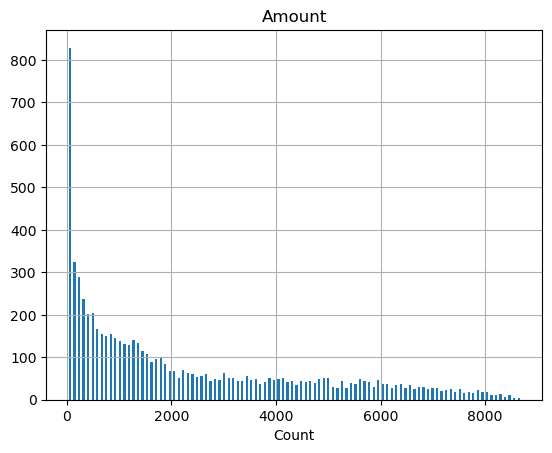

In [48]:
df["TotalCharges"].hist(bins=100,rwidth=0.5)
plt.xlabel("Count")
plt.title("Amount")
plt.show()

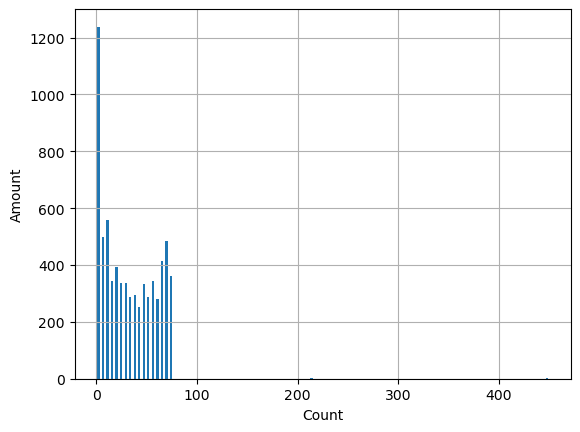

In [49]:
df["tenure"].hist(bins=100, rwidth=0.5)  # rwidth parametresi ile boşluk eklenir
plt.xlabel("Count")
plt.ylabel("Amount")
plt.show()


count   7043.000
mean       0.162
std        0.369
min        0.000
1%         0.000
5%         0.000
25%        0.000
50%        0.000
75%        0.000
95%        1.000
99%        1.000
max        1.000
Name: SeniorCitizen, dtype: float64


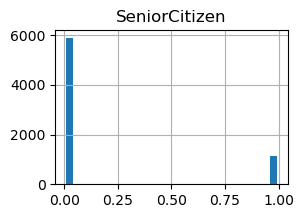

count   7043.000
mean      32.456
std       25.150
min        0.000
1%         1.000
5%         1.000
25%        9.000
50%       29.000
75%       55.000
95%       72.000
99%       72.000
max      450.000
Name: tenure, dtype: float64


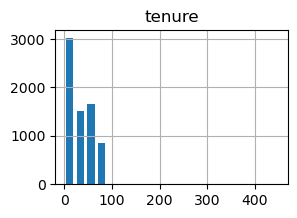

count   7043.000
mean      64.762
std       30.090
min       18.250
1%        19.200
5%        19.650
25%       35.500
50%       70.350
75%       89.850
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


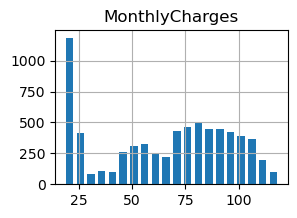

count   7032.000
mean    2283.300
std     2266.771
min       18.800
1%        19.900
5%        49.605
25%      401.450
50%     1397.475
75%     3794.738
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


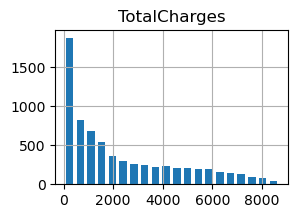

count   7043.000
mean       0.265
std        0.442
min        0.000
1%         0.000
5%         0.000
25%        0.000
50%        0.000
75%        1.000
95%        1.000
99%        1.000
max        1.000
Name: Churn, dtype: float64


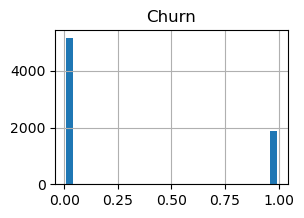

In [50]:
for col_name in num_col:
    print(df[col_name].describe(quantiles))
     
    plt.figure(figsize=(3,2))
    df[col_name].hist(bins=20, rwidth=0.7)  # rwidth parametresi ile boşluk eklenir
    plt.title(col_name)
    plt.show()

In [51]:
df.groupby("Churn").agg({"Churn":"count"})

,Churn
Churn,
0,5174
1,1869


In [52]:
df.groupby("gender").agg({"Churn":"mean"})

,Churn
gender,
Female,0.269
Male,0.262


# DESCRIPTIVE STATISTICS : Target Value Analysis

In [53]:
for col in cat_col:
    print("==========",col,"==========")
    display(pd.DataFrame({
                        "TARGET_MEAN": df.groupby(col)["Churn"].mean(),
                        "Count":df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts()/len(df)
                                    }))

========== gender ==========


,TARGET_MEAN,Count,Ratio
gender,,,
Female,0.269,3488,49.524
Male,0.262,3555,50.476


========== Partner ==========


,TARGET_MEAN,Count,Ratio
Partner,,,
No,0.330,3641,51.697
Yes,0.197,3402,48.303


========== Dependents ==========


,TARGET_MEAN,Count,Ratio
Dependents,,,
No,0.313,4933,70.041
Yes,0.155,2110,29.959


========== PhoneService ==========


,TARGET_MEAN,Count,Ratio
PhoneService,,,
No,0.249,682,9.683
Yes,0.267,6361,90.317


========== MultipleLines ==========


,TARGET_MEAN,Count,Ratio
MultipleLines,,,
No,0.250,3390,48.133
No phone service,0.249,682,9.683
Yes,0.286,2971,42.184


========== InternetService ==========


,TARGET_MEAN,Count,Ratio
InternetService,,,
DSL,0.190,2421,34.375
Fiber optic,0.419,3096,43.959
No,0.074,1526,21.667


========== OnlineSecurity ==========


,TARGET_MEAN,Count,Ratio
OnlineSecurity,,,
No,0.418,3498,49.666
No internet service,0.074,1526,21.667
Yes,0.146,2019,28.667


========== OnlineBackup ==========


,TARGET_MEAN,Count,Ratio
OnlineBackup,,,
No,0.399,3088,43.845
No internet service,0.074,1526,21.667
Yes,0.215,2429,34.488


========== DeviceProtection ==========


,TARGET_MEAN,Count,Ratio
DeviceProtection,,,
No,0.391,3095,43.944
No internet service,0.074,1526,21.667
Yes,0.225,2422,34.389


========== TechSupport ==========


,TARGET_MEAN,Count,Ratio
TechSupport,,,
No,0.416,3473,49.311
No internet service,0.074,1526,21.667
Yes,0.152,2044,29.022


========== StreamingTV ==========


,TARGET_MEAN,Count,Ratio
StreamingTV,,,
No,0.335,2810,39.898
No internet service,0.074,1526,21.667
Yes,0.301,2707,38.435


========== StreamingMovies ==========


,TARGET_MEAN,Count,Ratio
StreamingMovies,,,
No,0.337,2785,39.543
No internet service,0.074,1526,21.667
Yes,0.299,2732,38.790


========== Contract ==========


,TARGET_MEAN,Count,Ratio
Contract,,,
Month-to-month,0.427,3875,55.019
One year,0.113,1473,20.914
Two year,0.028,1695,24.066


========== PaperlessBilling ==========


,TARGET_MEAN,Count,Ratio
PaperlessBilling,,,
No,0.163,2872,40.778
Yes,0.336,4171,59.222


========== PaymentMethod ==========


,TARGET_MEAN,Count,Ratio
PaymentMethod,,,
Bank transfer (automatic),0.167,1544,21.922
Credit card (automatic),0.152,1522,21.610
Electronic check,0.453,2365,33.579
Mailed check,0.191,1612,22.888


# DESCRIPTIVE STATISTICS : Correlation Analysis

In [54]:
df[num_col].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000,0.017,0.220,0.102,0.151
tenure,0.017,1.000,0.239,0.805,-0.346
MonthlyCharges,0.220,0.239,1.000,0.651,0.193
TotalCharges,0.102,0.805,0.651,1.000,-0.199
Churn,0.151,-0.346,0.193,-0.199,1.000


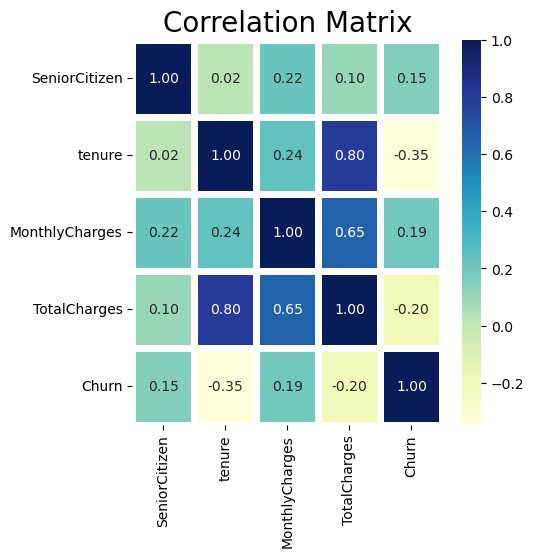

In [55]:
f, ax = plt.subplots(figsize=[5,5])
sns.heatmap(df[num_col].corr(),annot=True , fmt =".2f",ax=ax,cmap="YlGnBu", linewidths=5)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


## 

In [56]:
df[num_col].corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.346
dtype: float64

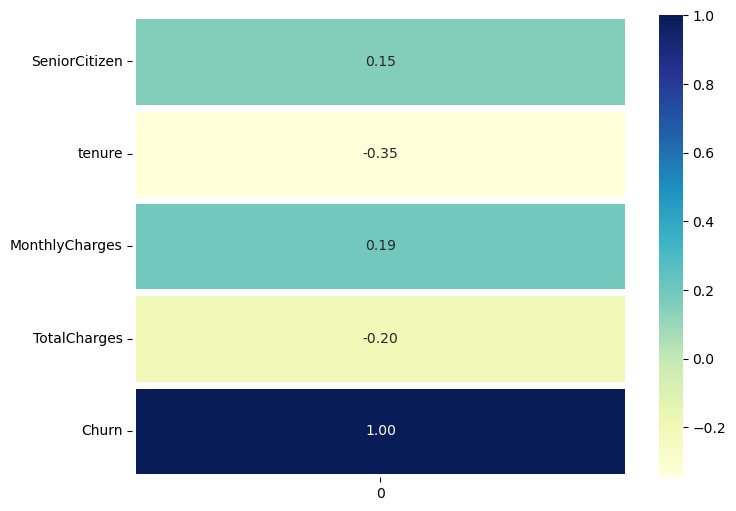

In [57]:
corr_data = df[num_col].corrwith(df["Churn"]).to_frame()  # DataFrame'e dönüştürme
fig, ax = plt.subplots(figsize=(8, 6))  # Grafik boyutunu belirleyin

sns.heatmap(corr_data, annot=True, fmt=".2f", ax=ax, cmap="YlGnBu", linewidths=5)
plt.show()

# BASE MODEL : Feature Engineering

## DATA MANUPLATION : Missing Values¶

In [58]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
df["TotalCharges"].head()

0     29.850
1   1889.500
2    108.150
3   1840.750
4    151.650
Name: TotalCharges, dtype: float64

In [60]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [61]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df["TotalCharges"].head()

0     29.850
1   1889.500
2    108.150
3   1840.750
4    151.650
Name: TotalCharges, dtype: float64

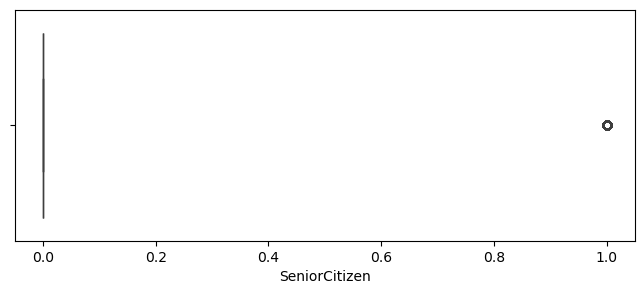

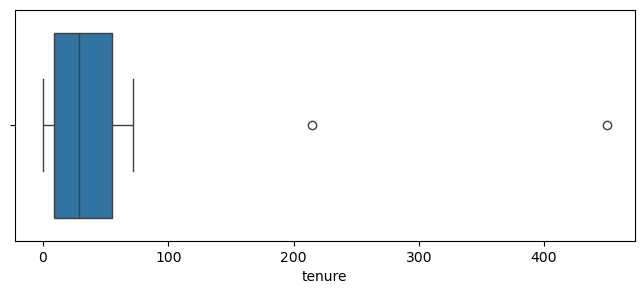

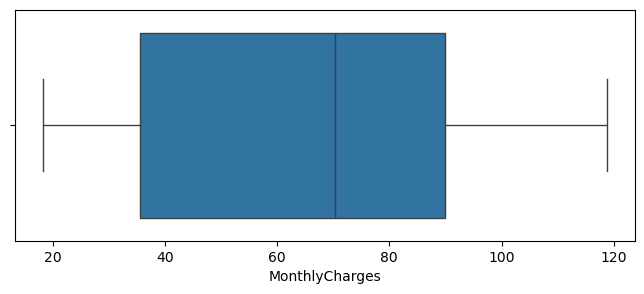

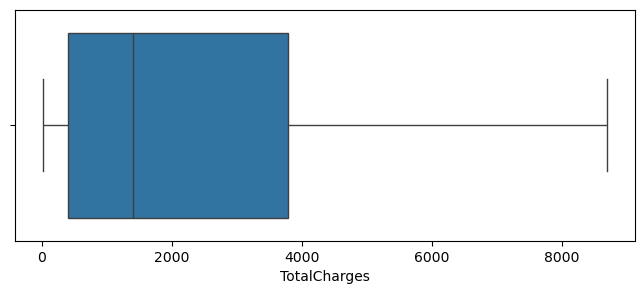

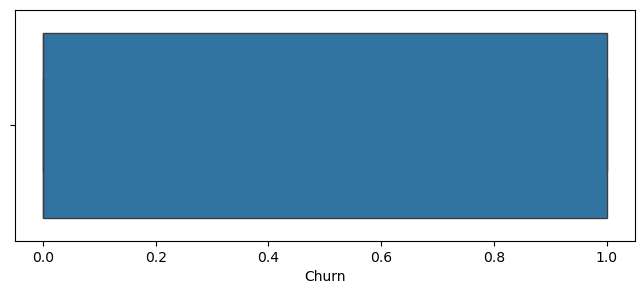

In [63]:
for col in num_col:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.xticks(rotation=0)
    plt.show()

In [64]:
df["tenure"].max()

450

In [65]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

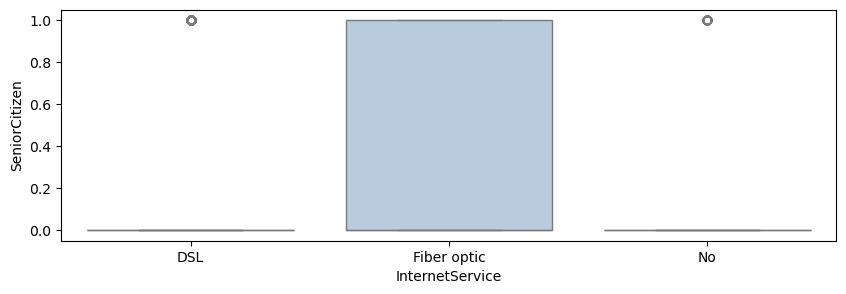

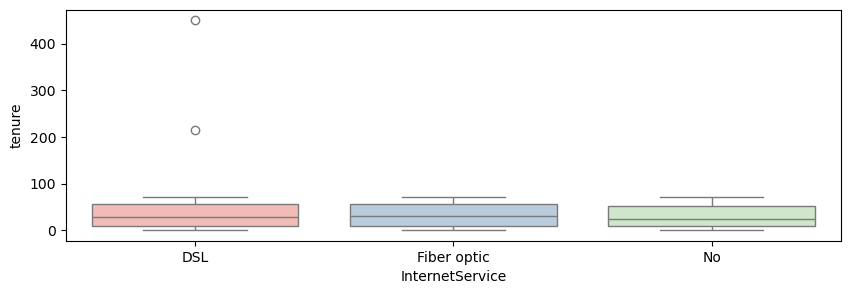

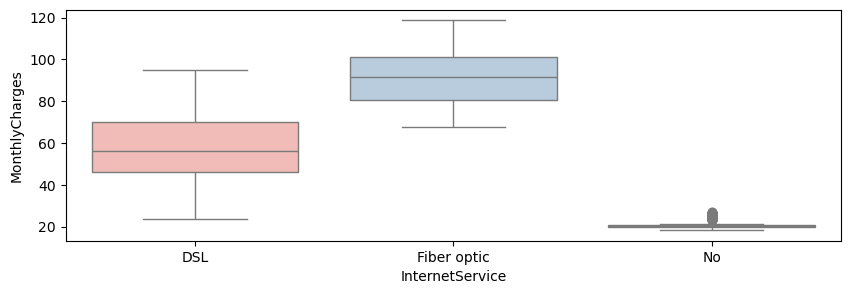

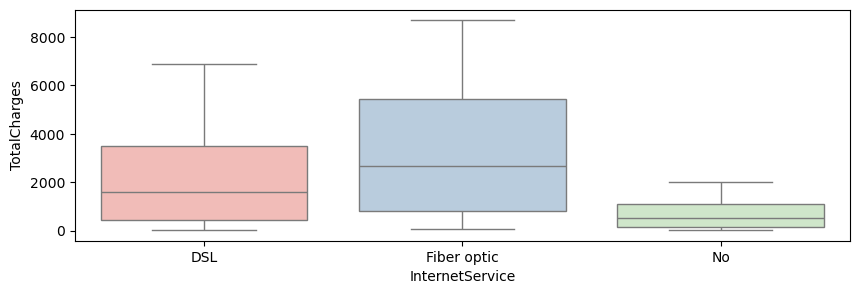

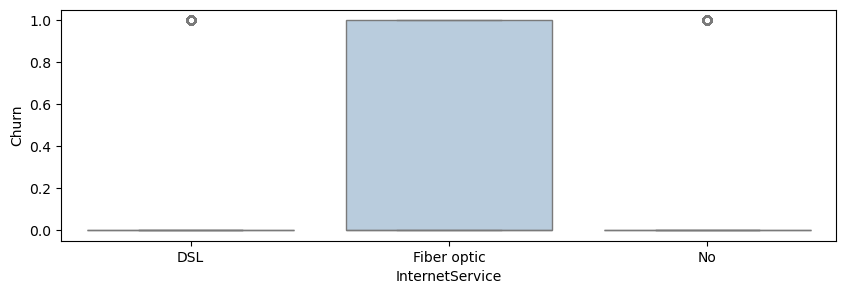

In [66]:
for col in num_col:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x='InternetService',y=df[col],palette='Pastel1')
    plt.show()

# Base Model Kurulumu

In [67]:
dff = df.copy()

In [68]:
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [69]:
cat_col = [col for col in cat_col if col != "Churn"]
#cat_col = [col for col in cat_col if col not in ["Churn"]]

In [70]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [71]:
dff[cat_col].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [72]:
pd.get_dummies(dff, columns=cat_col, drop_first=True).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.850,29.850,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.950,1889.500,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.850,108.150,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.300,1840.750,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.700,151.650,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [73]:
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [74]:
dff = pd.get_dummies(dff, columns=cat_col, drop_first=True)

In [75]:
dff.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.850,29.850,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.950,1889.500,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.850,108.150,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.300,1840.750,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.700,151.650,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [76]:
dff.astype(int).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [77]:
dff = dff.astype(int)

# START BASED MODELLING

In [78]:
dff.shape

(7043, 31)

In [79]:
y = dff["Churn"]
X = dff.drop(["Churn"],axis=1)

In [80]:
#train_test_split(X,y,test_size=0.30)

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=17)

In [82]:
dff.shape

(7043, 31)

In [83]:
X_train.shape

(4930, 30)

In [84]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5531,0,68,44,2983,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1036,0,68,114,7849,1,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
6281,0,6,20,116,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
6103,0,16,19,294,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
2776,1,16,74,1178,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [85]:
X_test.shape

(2113, 30)

In [86]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3616,1,69,87,6055,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2055,0,45,108,4964,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0
5394,0,48,105,5083,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0
3697,0,32,89,2901,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2516,1,16,96,1581,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0


# MODELLING¶

In [87]:
catboost_model = CatBoostClassifier(verbose=False , random_state=12345).fit(X_train,y_train)

In [88]:
y_pred = catboost_model.predict(X_test)

In [89]:
# Modelin performans metriklerini yazdırma
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 4)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 4)}")
print(f"Precision: {round(precision_score(y_test, y_pred), 4)}")
print(f"F1: {round(f1_score(y_test, y_pred), 4)}")

# ROC AUC score (ikili sınıflandırma için)
# predict_proba kullanarak tahmin edilen sınıf olasılıklarını alıyoruz
print(f"AUC: {round(roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1]), 4)}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.787
Recall: 0.4861
Precision: 0.6429
F1: 0.5536
AUC: 0.8247
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1539
           1       0.64      0.49      0.55       574

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


# MODEL IMPROVEMENT : Feature Extraction

In [91]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year


In [93]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [94]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtmek
df["New_Engaged"] = df["Contract"].apply(lambda x : 1 if x in ["One year","Two year"] else 0) 

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0


In [96]:
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x : 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0 , axis=1)

In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1


In [98]:
# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["New_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0 ,axis=1)

In [99]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1


In [100]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [101]:
# Kişi tüm servislerimizden yararlanıyor mu?
df["New_TAll_Services_Used"] = df.apply(lambda x: 1 if (x['PhoneService'] != "No" and 
                                                    x['InternetService'] != "No" and 
                                                    x['OnlineSecurity'] != "No" and 
                                                    x['OnlineBackup'] != "No" and 
                                                    x['DeviceProtection'] != "No" and 
                                                    x['TechSupport'] != "No" and 
                                                    x['StreamingTV'] != "No" and 
                                                    x['StreamingMovies'] != "No") else 0, axis=1)


In [102]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0


In [103]:
df["New_TAll_Services_Used"].value_counts()

New_TAll_Services_Used
0    6784
1     259
Name: count, dtype: int64

In [104]:
# Herhangi bir streaming hizmeti alan kişiler kimlerdi?
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") and (x["StreamingMovies"] == "Yes" ) else 0 ,axis=1)

In [105]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0


In [106]:
df["NEW_FLAG_ANY_STREAMING"].value_counts()

NEW_FLAG_ANY_STREAMING
0    5103
1    1940
Name: count, dtype: int64

In [107]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [108]:
# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [109]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,0


In [110]:
df["NEW_FLAG_AutoPayment"].value_counts()

NEW_FLAG_AutoPayment
0    3977
1    3066
Name: count, dtype: int64

In [111]:
# Ortalama olarak aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

In [112]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,0,14.925
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0,0,0,53.986
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0,0,0,36.050
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0,0,1,40.016
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,0,50.550


In [113]:
# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [114]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,0,14.925,0.500
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0,0,0,53.986,0.948
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0,0,0,36.050,0.669
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0,0,1,40.016,0.946
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,0,50.550,0.715


In [115]:
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [116]:
a = [col for col in df.columns if "NEW_TotalServices" in col]
a

['NEW_TotalServices']

In [117]:
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df.apply(lambda x: x["MonthlyCharges"] / (x["NEW_TotalServices"] + 1) if x["NEW_TotalServices"] > 0 else 0, axis=1)


In [118]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_TotalServices,NEW_AVG_Service_Fee
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,0,0,0,14.925,0.500,1,14.925
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,0,0,0,53.986,0.948,3,14.238
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,0,0,0,36.050,0.669,3,13.463
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,0,0,1,40.016,0.946,3,10.575
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,0,0,0,50.550,0.715,1,35.350


In [119]:
df.shape

(7043, 31)

# Encoding

In [120]:
# Yeni üretilen değişkenler için cat, num ayırımını tekrar yapalım.
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [121]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [122]:
num_cols

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'New_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'New_TAll_Services_Used',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment',
 'NEW_AVG_Charges',
 'NEW_Increase',
 'NEW_TotalServices',
 'NEW_AVG_Service_Fee']

In [123]:
binary_cols = [col for col in cat_cols if df[col].dtypes == 'O' and df[col].nunique()==2]

In [124]:
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [125]:
# Binary kolonlar label encoder yapacağız.
labelencoder = LabelEncoder()

In [126]:
for col in binary_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])

In [127]:
# Kategorik kolonlar için one hot encoder uygulayacağız.
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR']

In [128]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [129]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_TotalServices,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,0,1,0,1,0,1,29.850,29.850,0,0,1,1,0,0,0,14.925,0.500,1,14.925,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.950,1889.500,0,1,1,0,0,0,0,53.986,0.948,3,14.238,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
2,1,0,0,0,2,1,1,53.850,108.150,1,0,1,1,0,0,0,36.050,0.669,3,13.463,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,0,0,0,45,0,0,42.300,1840.750,0,1,1,0,0,0,1,40.016,0.946,3,10.575,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,0,0,0,0,2,1,1,70.700,151.650,1,0,1,1,0,0,0,50.550,0.715,1,35.350,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [130]:
df = df.astype(int)

In [131]:
df.shape

(7043, 46)

# ADVANCED MODEL

In [132]:
na_columns =[col for col in df.columns if df[col].isnull().sum() > 0 ]
print(na_columns)

[]


# Outlier Analyis

In [133]:
df["tenure"].quantile(0.05)

1.0

In [134]:
#  outlier_thresholds fonksiyonu ile analizi
def outlier_thresholds(df, col_name, q1=0.05, q3=0.95):
    # Q1 ve Q3'ün hesaplanması
    q1_value = df[col_name].quantile(q1)
    q3_value = df[col_name].quantile(q3)
    
    # IQR'ın hesaplanması
    iqr = q3_value - q1_value
    
    # Alt ve üst uç değerlerin hesaplanması
    lower_bound = q1_value - 1.5 * iqr
    upper_bound = q3_value + 1.5 * iqr
    
    return lower_bound, upper_bound
    
lower, upper = outlier_thresholds(df, "tenure")
print(f"Alt sınır: {lower}, Üst sınır: {upper}")

Alt sınır: -105.5, Üst sınır: 178.5


In [135]:
# Manuel Analiz
interquantile_range = df["tenure"].quantile(0.95)-df["tenure"].quantile(0.05)
up_limit = df["tenure"].quantile(0.95) + 1.5 * interquantile_range
print(f"up limit {up_limit}")

up limit 178.5


In [136]:
low_limit = df["tenure"].quantile(0.05) - 1.5 * interquantile_range
print(f"low limit {low_limit}")

low limit -105.5


<Axes: xlabel='tenure'>

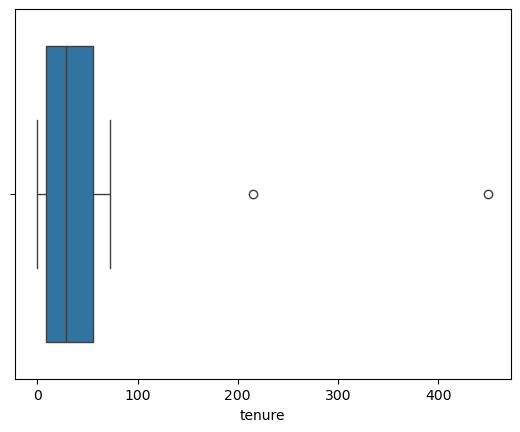

In [137]:
sns.boxplot(x=df["tenure"])

In [138]:
# Outlier Analysis sürecin fonksiyon hali
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    low_val=df[(dataframe[variable] < low_limit)]
    up_val=df[(dataframe[variable] < up_limit)]
    print(f"değerler {low_limit} , {up_limit}")
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [139]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col,check_outlier(df,col))
    if check_outlier(df,col):
        replace_with_thresholds(df, col)
        


SeniorCitizen False
tenure True
değerler -105.5 , 178.5
MonthlyCharges False
TotalCharges False
Churn False
New_Engaged False
NEW_noProt False
NEW_Young_Not_Engaged False
New_TAll_Services_Used True
değerler 0.0 , 0.0
NEW_FLAG_ANY_STREAMING False
NEW_FLAG_AutoPayment False
NEW_AVG_Charges True
değerler -117.5 , 238.5
NEW_Increase True
değerler -1.5 , 2.5
NEW_TotalServices False
NEW_AVG_Service_Fee False


<Axes: xlabel='tenure'>

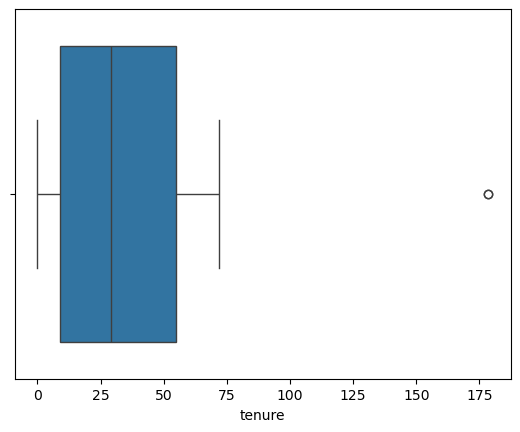

In [140]:
sns.boxplot(x=df["tenure"])

In [141]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_TotalServices,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,0,1,0,1.000,0,1,29,29,0,0,1,1,0,0,0,14.000,0.000,1,14,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34.000,1,0,56,1889,0,1,1,0,0,0,0,53.000,0.000,3,14,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,2.000,1,1,53,108,1,0,1,1,0,0,0,36.000,0.000,3,13,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,45.000,0,0,42,1840,0,1,1,0,0,0,1,40.000,0.000,3,10,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,2.000,1,1,70,151,1,0,1,1,0,0,0,50.000,0.000,1,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [142]:
dff = df.copy()
dff.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_Engaged,NEW_noProt,NEW_Young_Not_Engaged,New_TAll_Services_Used,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_TotalServices,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,0,1,0,1.000,0,1,29,29,0,0,1,1,0,0,0,14.000,0.000,1,14,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34.000,1,0,56,1889,0,1,1,0,0,0,0,53.000,0.000,3,14,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,2.000,1,1,53,108,1,0,1,1,0,0,0,36.000,0.000,3,13,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,45.000,0,0,42,1840,0,1,1,0,0,0,1,40.000,0.000,3,10,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,2.000,1,1,70,151,1,0,1,1,0,0,0,50.000,0.000,1,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [143]:
dff.shape

(7043, 46)

In [144]:
y = dff["Churn"]
X = dff.drop(["Churn"],axis=1)

In [145]:
X_train , X_test,y_train,y_test = train_test_split(X_train,y_train)

In [146]:
X_test.shape

(1233, 30)

# Catboost_model

In [147]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [148]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.81
Recall: 0.64
Precision: 0.57
F1: 0.6
Auc: 0.75
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       950
           1       0.57      0.64      0.60       283

    accuracy                           0.81      1233
   macro avg       0.73      0.75      0.74      1233
weighted avg       0.82      0.81      0.81      1233



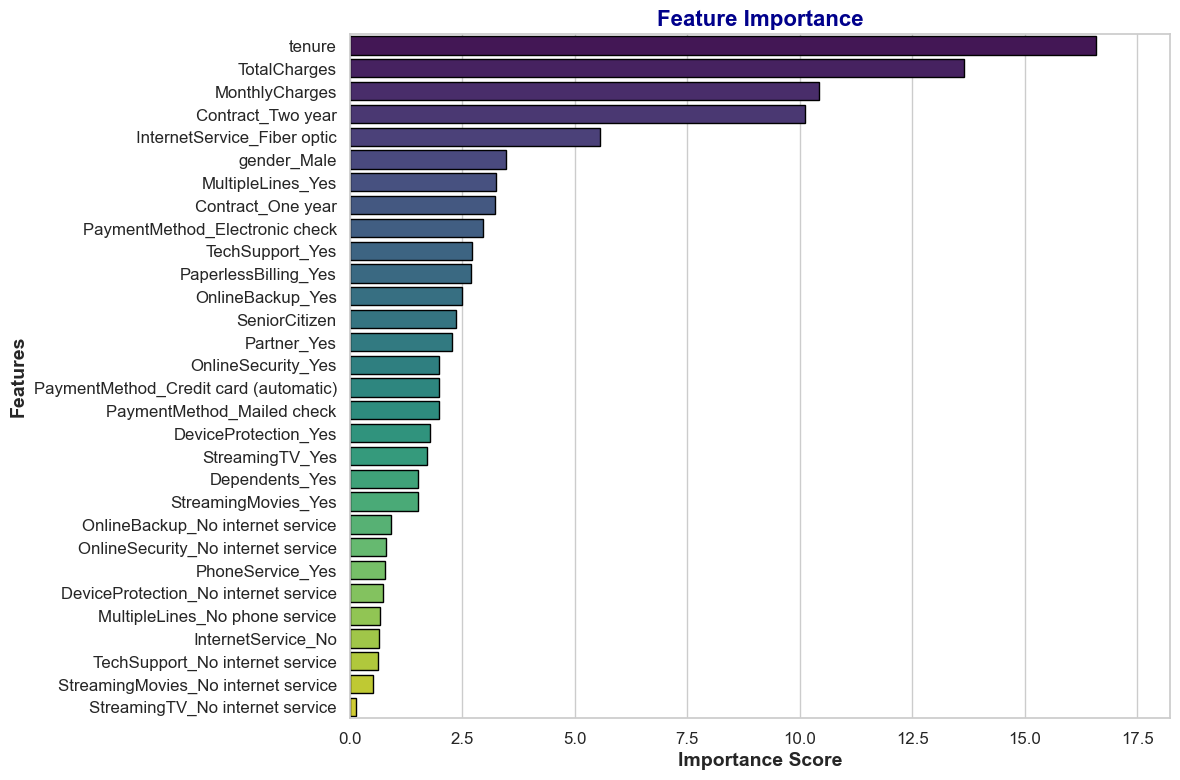

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_importance(model, features, num=None):
    if num is None:
        num = len(features.columns)  # Varsayılan olarak tüm özellikleri seçer

    # Modelin özelliklerin önem derecelerini ve sütun isimlerini birleştir
    feature_imp = pd.DataFrame({
        'Value': model.feature_importances_,
        'Feature': features.columns
    })
    
    # En önemli 'num' özelliği seç
    feature_imp = feature_imp.sort_values(by="Value", ascending=False)[:num]

    # Grafik ayarları
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid", font_scale=1.1)  # Beyaz arka plan ile net görünüm
    colors = sns.color_palette("viridis", len(feature_imp))  # Profesyonel bir renk gradyanı seçimi

    # Barplot
    sns.barplot(
        x="Value", 
        y="Feature", 
        data=feature_imp, 
        palette=colors,
        edgecolor="black"  # Çubukların çevresine ince siyah bir kenar ekleyin
    )
    
    # Grafik başlık ve etiket ayarları
    plt.title('Feature Importance', fontsize=16, weight='bold', color='darkblue')
    plt.xlabel('Importance Score', fontsize=14, weight='bold')
    plt.ylabel('Features', fontsize=14, weight='bold')
    
    # Eksende sadece gerekli değer aralığını gösterin
    plt.xlim(0, feature_imp['Value'].max() * 1.1)
    
    # Grafik alt yerleşim ayarı
    plt.tight_layout()
    plt.show()

# Özelliklerin önem derecelerini görselleştirme
plot_importance(catboost_model, X_train)

In [150]:
catboost_model.feature_importances_

array([ 2.36152197, 16.57853198, 10.42215802, 13.64343197,  3.45800726,
        2.27482897,  1.52264571,  0.77578754,  0.67644395,  3.25127437,
        5.56699744,  0.63453443,  0.81123853,  1.98713458,  0.90842096,
        2.48861471,  0.73081195,  1.78224561,  0.61950561,  2.70325433,
        0.13413968,  1.71779196,  0.50872153,  1.50529228,  3.22238872,
       10.1075829 ,  2.68842225,  1.98636696,  2.95632756,  1.97557626])

In [151]:
feature_imp = pd.DataFrame({'Value': catboost_model.feature_importances_, 'Feature': X_train.columns})
feature_imp.sort_values(by="Value",ascending=False)

,Value,Feature
1,16.579,tenure
3,13.643,TotalCharges
2,10.422,MonthlyCharges
25,10.108,Contract_Two year
10,5.567,InternetService_Fiber optic
4,3.458,gender_Male
9,3.251,MultipleLines_Yes
24,3.222,Contract_One year
28,2.956,PaymentMethod_Electronic check
19,2.703,TechSupport_Yes


# Random Forest

In [152]:
rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [153]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.79
Recall: 0.62
Precision: 0.49
F1: 0.55
Auc: 0.73
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       979
           1       0.49      0.62      0.55       254

    accuracy                           0.79      1233
   macro avg       0.69      0.73      0.71      1233
weighted avg       0.81      0.79      0.80      1233



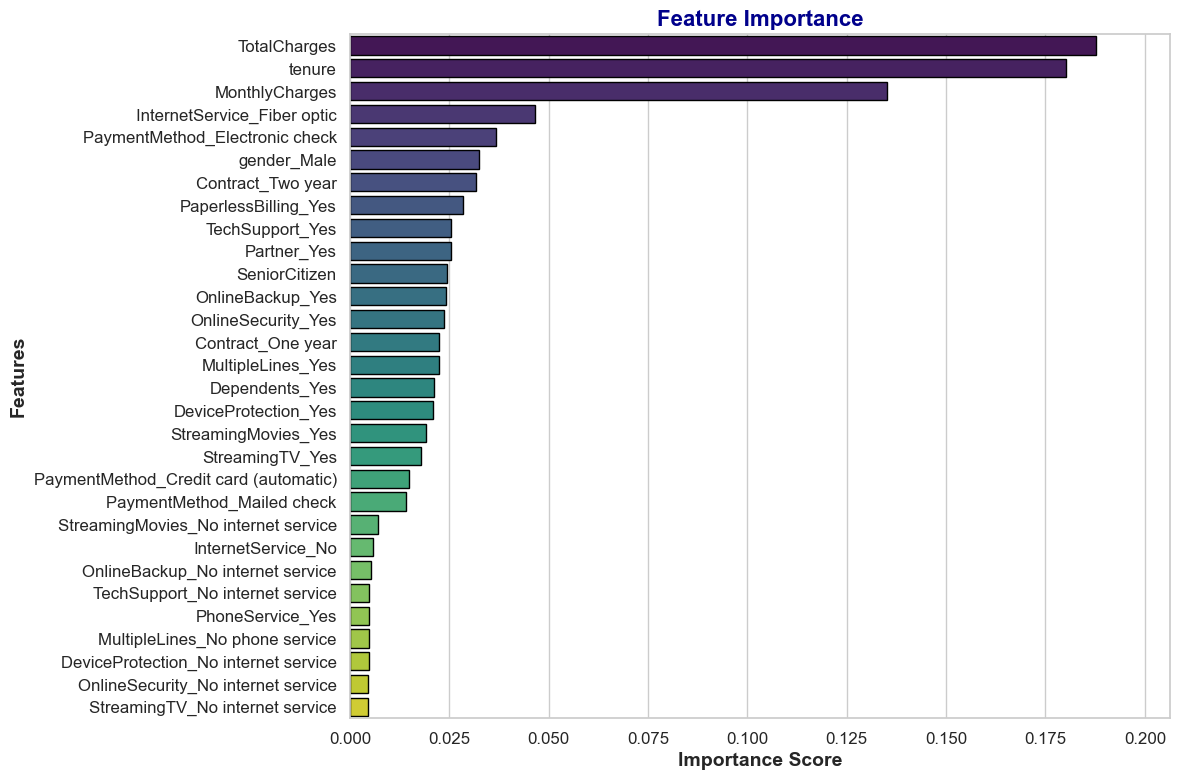

In [154]:
plot_importance(rf_model, X_train)

# Cart

In [155]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [156]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.72
Recall: 0.46
Precision: 0.47
F1: 0.47
Auc: 0.64
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       908
           1       0.47      0.46      0.47       325

    accuracy                           0.72      1233
   macro avg       0.64      0.64      0.64      1233
weighted avg       0.72      0.72      0.72      1233



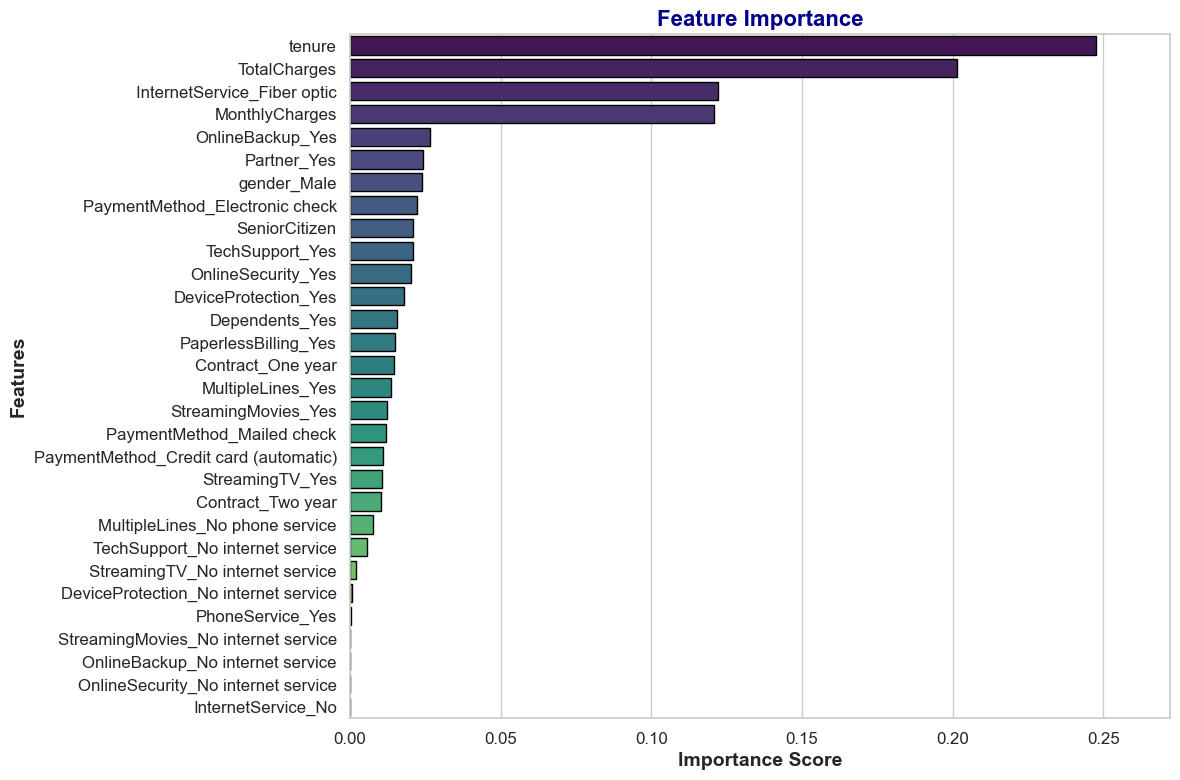

In [159]:
plot_importance(cart_model, X_train)